# Longest Common Substring problem
### Author: Krzysztof Chmielewski
In this part i will focus on LCSub problem solving using suffix structures and dynamic programming and comparing these methods. So at the beginning we will need some imports. I decided to copy functions that calculate LCSub from my `substring_problems.py` file instead of importing them for better overview.

In [1]:
from ukkonen import SuffixTree, Node
from suffix_array import SuffixArray

### LCSub using suffix array

In [2]:
def longest_common_substring_sa(str1: str, str2: str) -> str:
    """
    Find the longest common substring of two strings using a suffix array.
 
    Args:
        str1: First string
        str2: Second string
 
    Returns:
        The longest common substring
    """
    # Concatenate the strings with a unique separator
    combined = str1 + "#" + str2 + "$"
    seperator_index = len(str1)
 
    sa = SuffixArray(combined)

    n = len(sa.suffixes)
    lcp = [0] * (n-1)
    rank = [0] * n
    for i in range(n):
        rank[sa.suffixes[i]] = i

    k = 0
    for i in range(n):
        if rank[i] == n - 1:
            k = 0
            continue

        j = sa.suffixes[rank[i] + 1]
        while i + k < n and j + k < n and sa.text[i + k] == sa.text[j + k]:
            k += 1

        lcp[rank[i]] = k
        if k > 0:
            k -= 1
    
    max_len = 0
    position = 0
    for i in range(1, n):
        s1 = sa.suffixes[i]
        s2 = sa.suffixes[i - 1]

        if (s1 < seperator_index) != (s2 < seperator_index):
            if lcp[i - 1] > max_len:
                max_len = lcp[i - 1]
                position = s1

    return combined[position : position + max_len] if max_len > 0 else ""

### LCSub using suffix tree

In [3]:
def longest_common_substring_st(str1: str, str2: str) -> str:
    """
    Find the longest common substring of two strings using a suffix tree.
 
    Args:
        str1: First string
        str2: Second string
 
    Returns:
        The longest common substring
    """
    # Concatenate the strings with a unique separator
    combined = str1 + "#" + str2 + "$"
    seperator_index = len(str1)
    longest_substring = ""
 
    # Build a suffix tree for the combined string
    st = SuffixTree(combined)

    # Traverse the tree to find the longest path that occurs in both strings
    def DFS(node : Node, path : list):
        nonlocal longest_substring
        bits = set()

        if not node.children:
            if node.id < seperator_index:
                bits.add(0)
            elif node.id > seperator_index:
                bits.add(1)
            return bits
        
        for child in node.children.values():
            edge_end = child.end.value if hasattr(child.end, 'value') else child.end
            edge_text = st.text[child.start : edge_end]

            bits.update(DFS(child, path + [edge_text]))

        if 0 in bits and 1 in bits:
            substring = "".join(path)
            if len(substring) > len(longest_substring):
                longest_substring = substring

        return bits
    
    DFS(st.root, [])
    return longest_substring

### LCSub using dynamic programming

In [4]:
def longest_common_substring_dp(str1: str, str2: str) -> str:
    """
    Find the longest common substring of two strings using dynamic programming.
 
    Args:
        str1: First string
        str2: Second string
 
    Returns:
        The longest common substring
    """
    n = len(str1)
    m = len(str2)

    max_len, end_pos = 0, 0

    DP = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[j - 1] == str2[i - 1]:
                DP[i][j] = DP[i - 1][j - 1] + 1

                if DP[i][j] > max_len:
                    max_len = DP[i][j]
                    end_pos = j
            else:
                DP[i][j] = 0

    return str1[end_pos - max_len: end_pos]

### Visual comparison of LCSub algorithms

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
import timeit

def randtext(size: int) -> str:
    return "".join( (chr(ord('a') + random.randint(0,25))) for _ in range(size) )

def plt_approximate(ax, xs, ys, deg, label = None, title = None, **kwargs):
    poly = np.poly1d(np.polyfit(xs, ys, deg))
    domain = np.linspace(min(xs), max(xs), 100)

    ax.plot(domain, poly(domain), label = label, **kwargs)
    ax.scatter(xs, ys, **kwargs)
    if label: ax.legend()
    if title: ax.set_title(title)

def time_exec(fun, *data):
    return timeit.timeit(lambda: fun(*data), number=1)

In [16]:
sizes = np.linspace(10, 1e3, 50, dtype=int)

sa_times, st_times, dp_times = [], [], []

for size in sizes:
    str1 = randtext(size)
    str2 = randtext(size)
    sa_times.append(time_exec(longest_common_substring_sa, str1, str2))
    st_times.append(time_exec(longest_common_substring_st, str1, str2))
    dp_times.append(time_exec(longest_common_substring_dp, str1, str2))

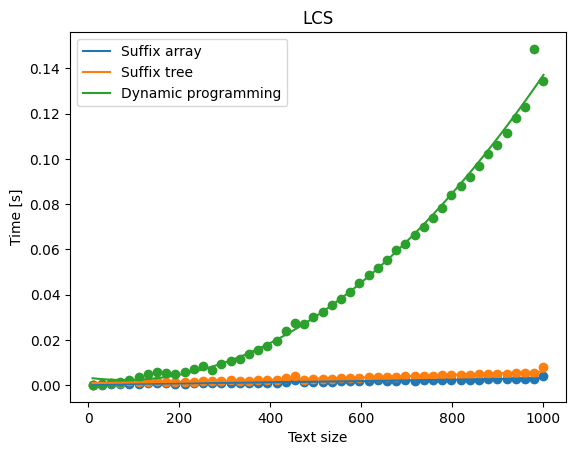

In [ ]:
ax = plt.gca()
ax.set_title("Longest common substring")
ax.set_xlabel("Text size")
ax.set_ylabel("Time [s]")

plt_approximate(ax, sizes, sa_times, deg=2, label="Suffix array")
plt_approximate(ax, sizes, st_times, deg=2, label="Suffix tree")
plt_approximate(ax, sizes, dp_times, deg=2, label="Dynamic programming")
plt.show()

In [18]:
sizes = np.linspace(10, 5e4, 10, dtype=int)

sa_times, st_times = [], []

for size in sizes:
    str1 = randtext(size)
    str2 = randtext(size)
    sa_times.append(time_exec(longest_common_substring_sa, str1, str2))
    st_times.append(time_exec(longest_common_substring_st, str1, str2))

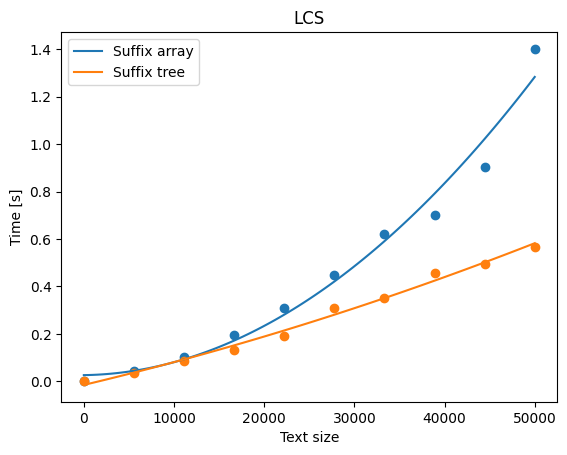

In [ ]:
ax = plt.gca()
ax.set_title("Longest common substring")
ax.set_xlabel("Text size")
ax.set_ylabel("Time [s]")

plt_approximate(ax, sizes, sa_times, deg=2, label="Suffix array")
plt_approximate(ax, sizes, st_times, deg=2, label="Suffix tree")
plt.show()

### Time & Space complexity using suffix structure (suffix tree)

- Space complexity: $O(n)$ where $n$ is length of combined strings (in this case both are the same length of $m$, so at the end space complexity can be written as $O(n) = O(m)$)
- Time complexity: $O(k)$ due to Depth-First-Search going through each Node once ($k$ is number of nodes in suffix tree)

In `substring_problems.py` file there is also `longest_common_substring_multiple` and `longest_palindromic_substring` functions. Analyzing this functions we can see that for time complexity and space complexity is $O(nk)$ where $n$ is length of single string (counting that every string has the same length) and $k$ is number of strings. (For multiple LCSub problem we also have more space taken by getting $k$ seperators so complexity is $O(n(k+1))$)